In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore') 

# List files in the input directory (adjust path as necessary)
import os
input_dir = "input"
print(os.listdir(input_dir))


['cwurData.csv', 'database_earthquake.csv', 'education_expenditure_supplementary_data.csv', 'MedianHouseholdIncome2015.csv', 'PercentagePeopleBelowPovertyLevel.csv', 'PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'school_and_country_table.csv', 'shanghaiData.csv', 'ShareRaceByCity.csv', 'timesData.csv']


In [2]:
# Read datasets from CSV files
median_house_hold_in_come = pd.read_csv('input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Bar Plot


Text(0.5, 1.0, 'Poverty Rate Given States')

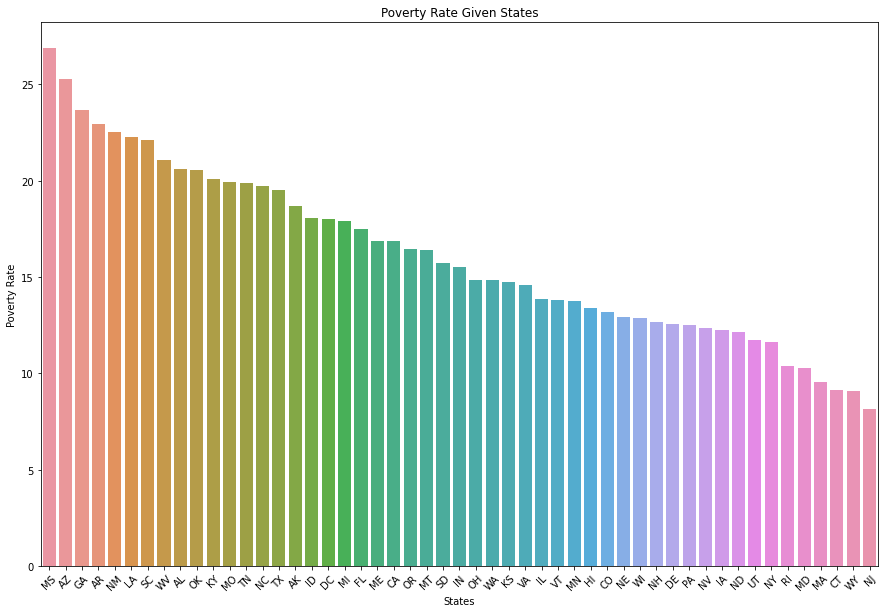

In [5]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [6]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [7]:
# kill.name.value_counts()
["taner", "ozer"]

['taner', 'ozer']

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

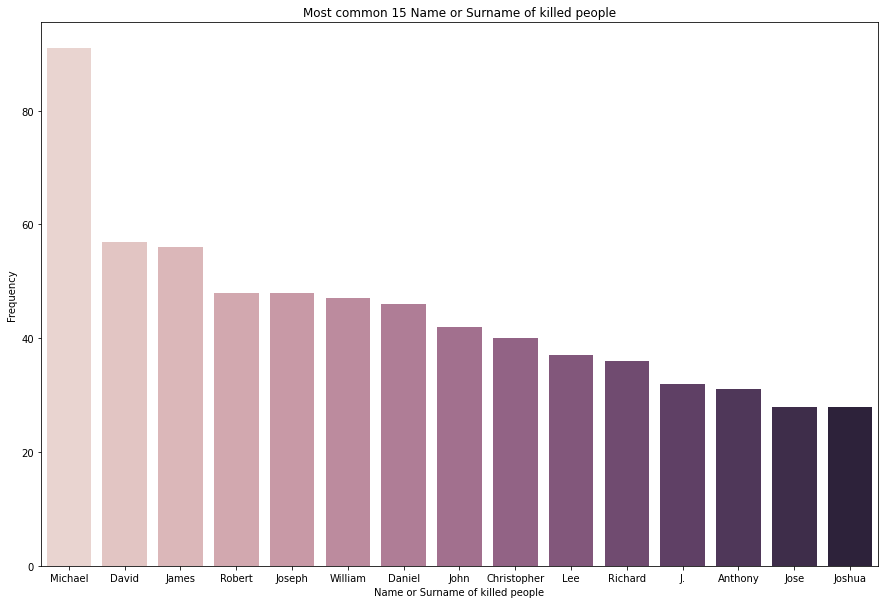

In [8]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [9]:
percent_over_25_completed_highSchool.head()


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [10]:
percent_over_25_completed_highSchool.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


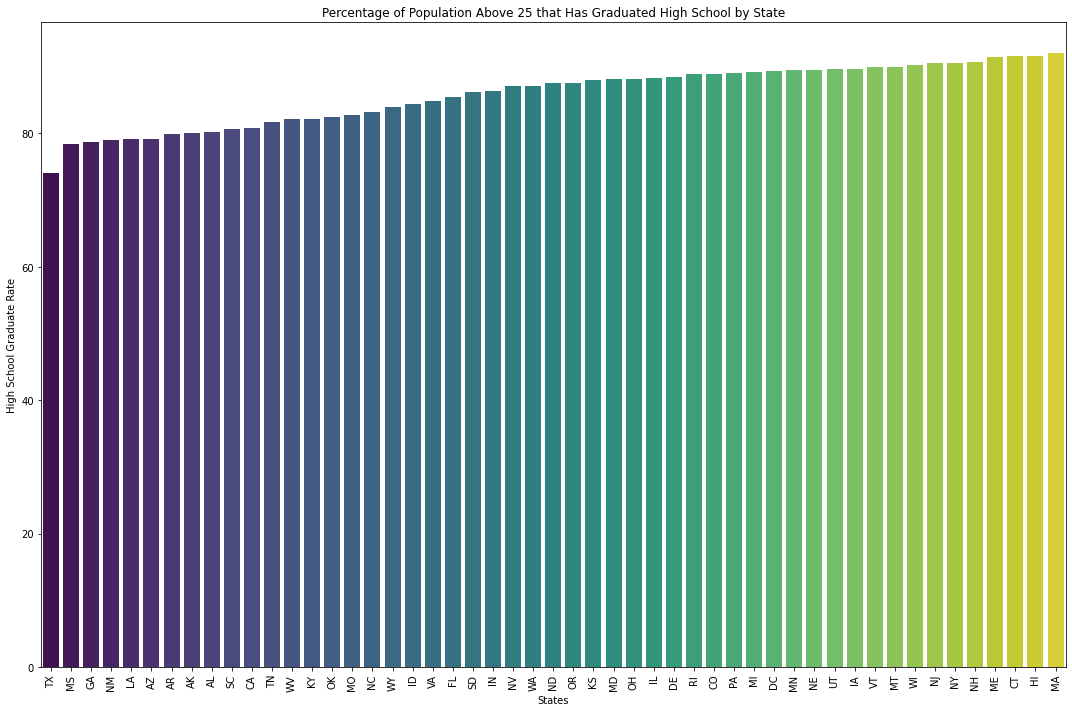

In [11]:
# Replace '-' with 0.0 and convert to float
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'], 0.0, inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

# Get unique states
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())

# Calculate average high school graduation rate for each state
area_highschool = []
for area in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == area]
    area_highschool_rate = sum(x.percent_completed_hs) / len(x)
    area_highschool.append(area_highschool_rate)

# Create a DataFrame for visualization
data = pd.DataFrame({'State': area_list, 'High School Graduate Rate': area_highschool})

# Sort the data by high school graduation rate
sorted_data = data.sort_values(by='High School Graduate Rate')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='High School Graduate Rate', data=sorted_data, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Population Above 25 that Has Graduated High School by State")
plt.tight_layout()
plt.show()

In [12]:
share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [13]:
share_race_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


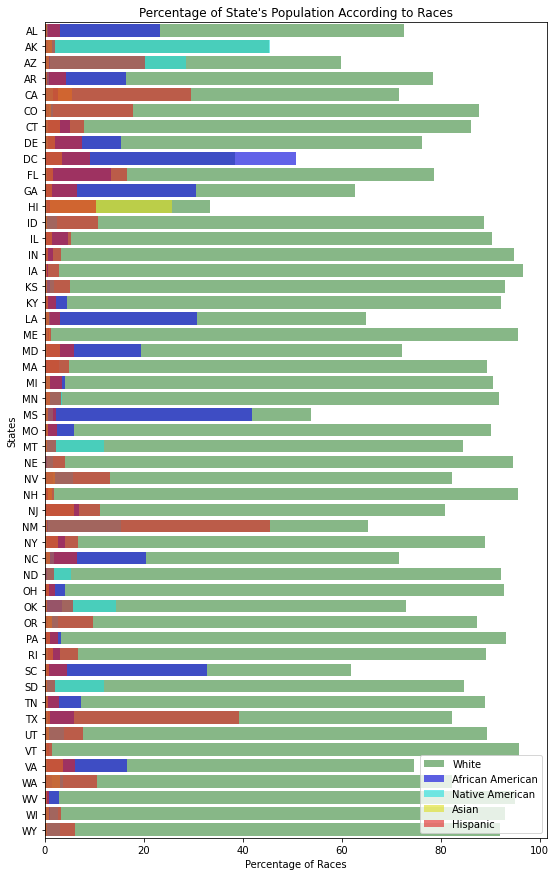

In [14]:
# Replace '-' and '(X)' with 0.0 and convert columns to float
share_race_city.replace(['-'], 0.0, inplace=True)
share_race_city.replace(['(X)'], 0.0, inplace=True)
share_race_city.loc[:, ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = share_race_city.loc[:, ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].astype(float)

# Get unique list of states
area_list = share_race_city['Geographic area'].unique()

# Initialize lists to hold the share of each race
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

# Calculate the average percentage for each race in each state
for area in area_list:
    state_data = share_race_city[share_race_city['Geographic area'] == area]
    share_white.append(state_data['share_white'].mean())
    share_black.append(state_data['share_black'].mean())
    share_native_american.append(state_data['share_native_american'].mean())
    share_asian.append(state_data['share_asian'].mean())
    share_hispanic.append(state_data['share_hispanic'].mean())

# Visualization
f, ax = plt.subplots(figsize=(9, 15))

# Plotting each race's share using seaborn's barplot
sns.barplot(x=share_white, y=area_list, color='green', alpha=0.5, label='White')
sns.barplot(x=share_black, y=area_list, color='blue', alpha=0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha=0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha=0.6, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha=0.6, label='Hispanic')

# Adding legend, labels, and title
ax.legend(loc='lower right', frameon=True)
ax.set(xlabel='Percentage of Races', ylabel='States', title="Percentage of State's Population According to Races")

# Display the plot
plt.show()

Point Plot


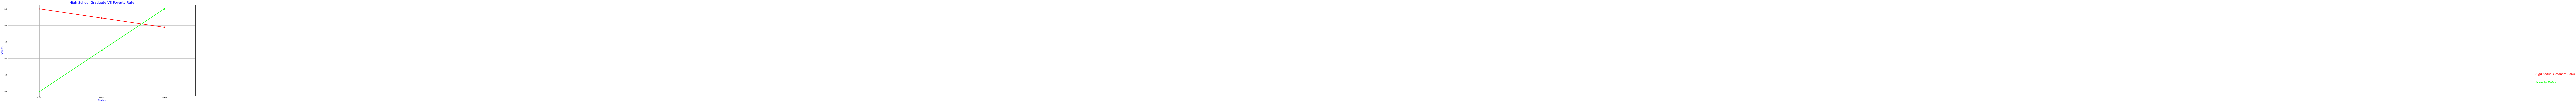

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for illustration (replace with your actual data)
sorted_data = pd.DataFrame({
    'area_list': ['State1', 'State2', 'State3'],
    'area_poverty_ratio': [15.0, 10.0, 20.0]
})
sorted_data2 = pd.DataFrame({
    'area_list': ['State1', 'State2', 'State3'],
    'area_highschool_ratio': [85.0, 90.0, 80.0]
})

# Ensure the columns exist
if 'area_poverty_ratio' in sorted_data.columns and 'area_highschool_ratio' in sorted_data2.columns:
    # Normalize the columns
    sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])
    sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / max(sorted_data2['area_highschool_ratio'])

    # Concatenate the dataframes
    data = pd.concat([sorted_data.set_index('area_list'), sorted_data2.set_index('area_list')['area_highschool_ratio']], axis=1).reset_index()

    # Sort the data by 'area_poverty_ratio'
    data.sort_values('area_poverty_ratio', inplace=True)

    # Visualize the data
    f, ax1 = plt.subplots(figsize=(20, 10))
    sns.pointplot(x='area_list', y='area_poverty_ratio', data=data, color='lime', alpha=0.8)
    sns.pointplot(x='area_list', y='area_highschool_ratio', data=data, color='red', alpha=0.8)
    plt.text(40, 0.6, 'High School Graduate Ratio', color='red', fontsize=17, style='italic')
    plt.text(40, 0.55, 'Poverty Ratio', color='lime', fontsize=18, style='italic')
    plt.xlabel('States', fontsize=15, color='blue')
    plt.ylabel('Values', fontsize=15, color='blue')
    plt.title('High School Graduate VS Poverty Rate', fontsize=20, color='blue')
    plt.grid()
    plt.show()
else:
    print("Column 'area_poverty_ratio' or 'area_highschool_ratio' does not exist in the provided dataframes.")


In [19]:
data.head()


,area_list,area_poverty_ratio,area_highschool_ratio
1,State2,0.50,1.000000
0,State1,0.75,0.944444
2,State3,1.00,0.888889


Joint Plot

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

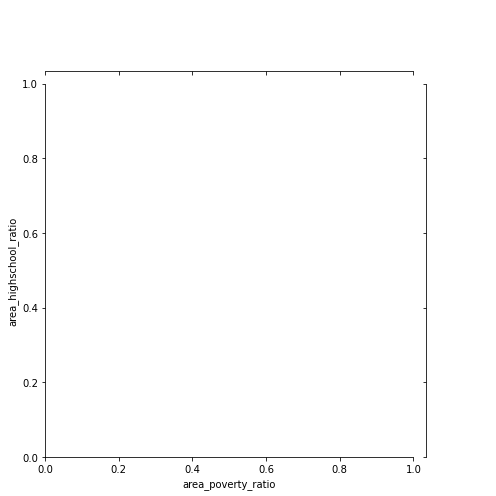

In [20]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()